In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/kaggle/input/insurance-dataset-regression-analysis/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [14]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [15]:
# this shows a imbalanced data set

In [16]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [17]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

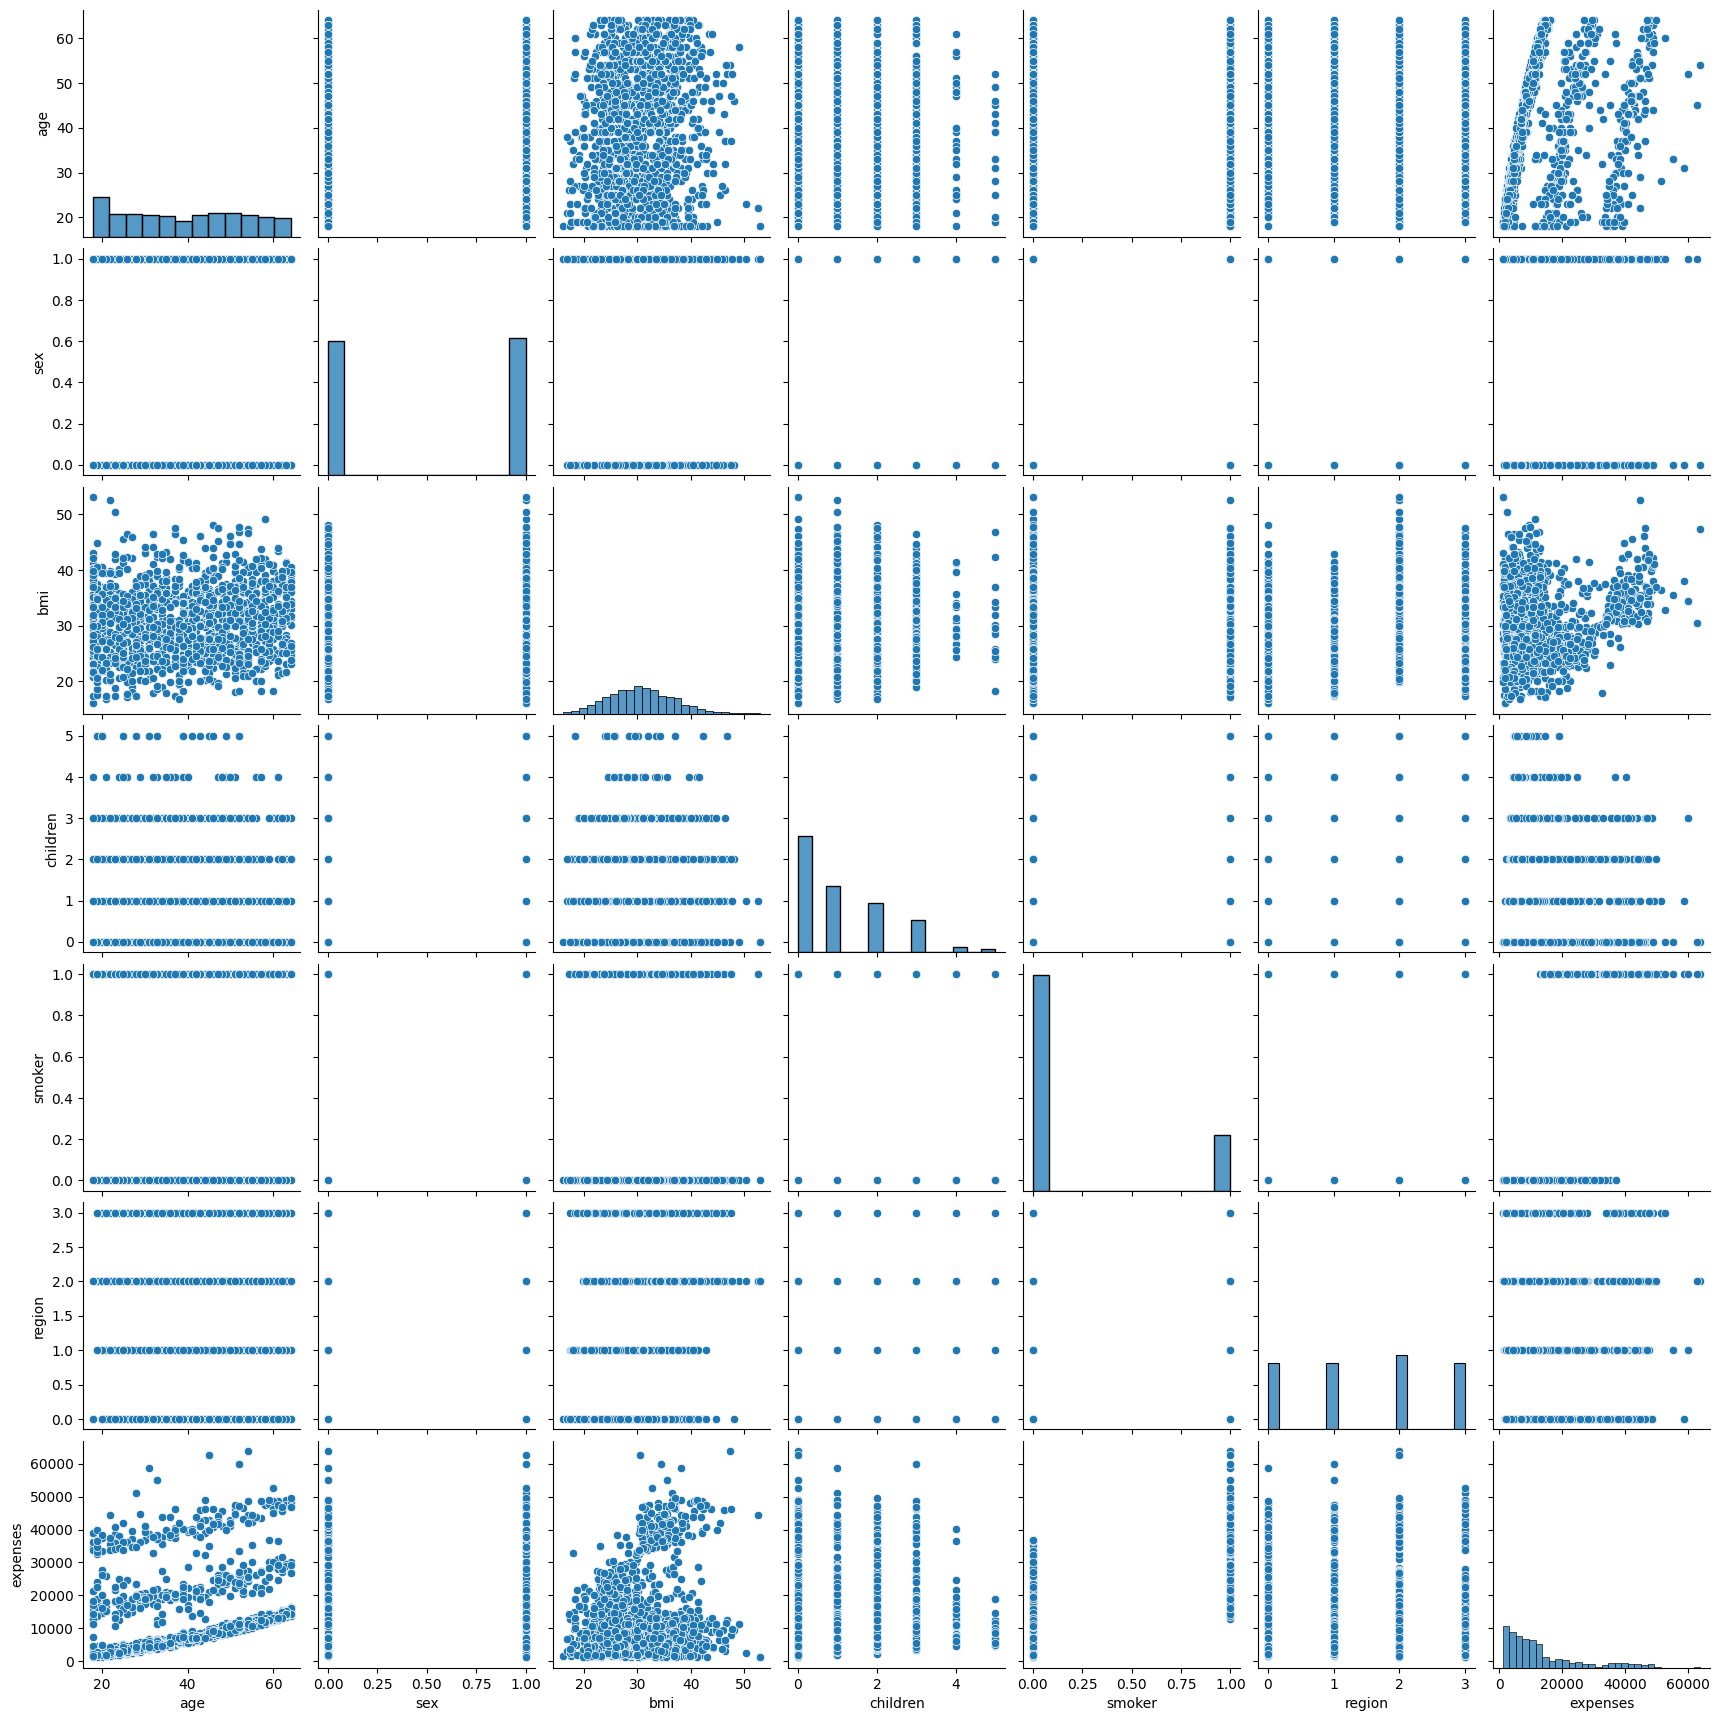

In [55]:
sns.pairplot(df)
plt.show()

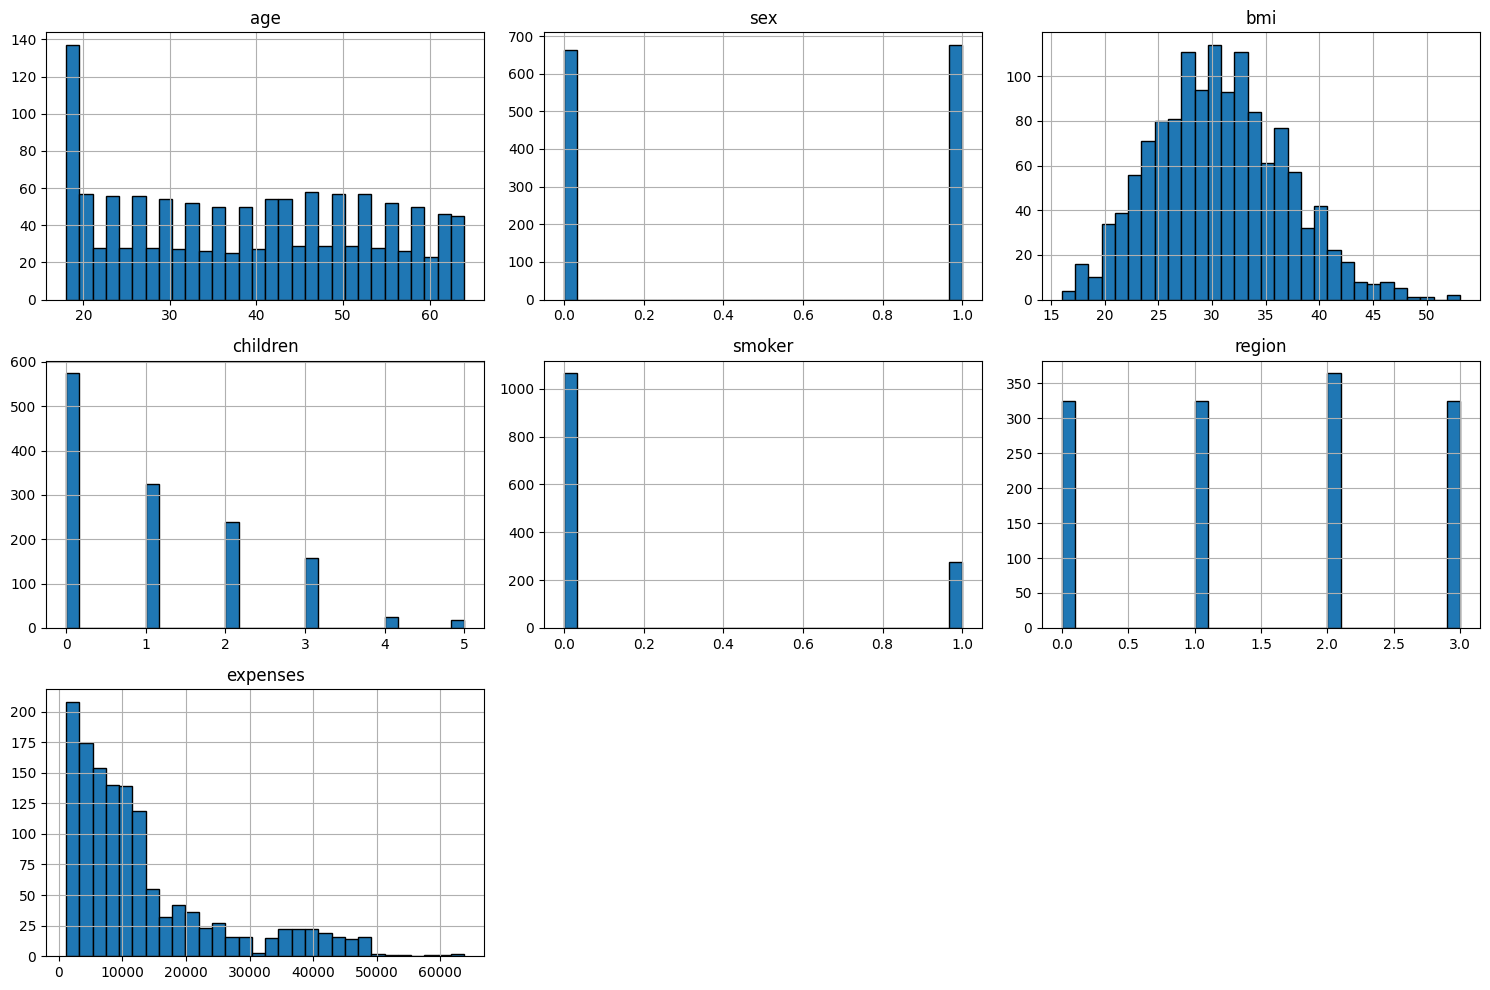

In [54]:
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

In [21]:
# FOR CATEGROICAL VALUES WILL USE COUNT PLOT

<Axes: xlabel='smoker', ylabel='count'>

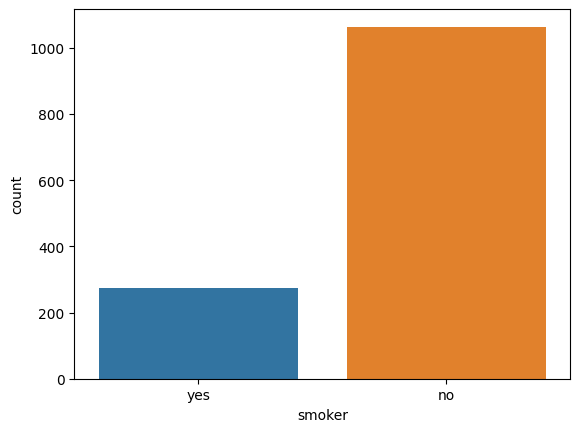

In [22]:
sns.countplot(x=df['smoker'],data=df)

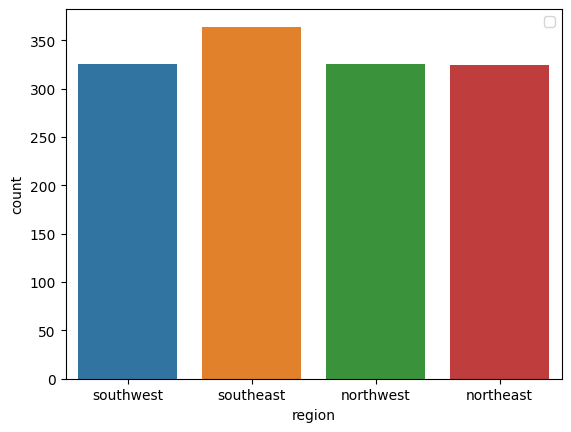

In [24]:
sns.countplot(x=df['region'],data=df)

In [26]:
# we look for outliers in the numericcal data type 
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

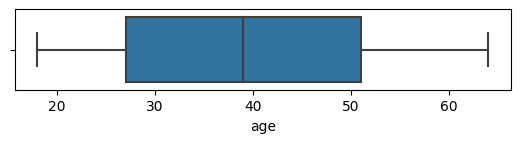

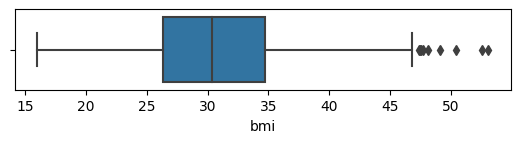

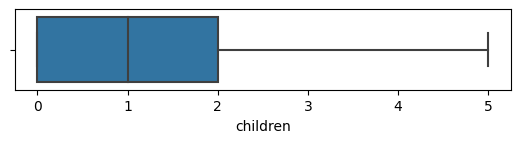

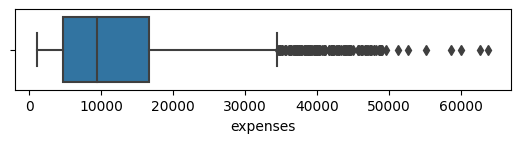

In [28]:
for idx,col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols),1,idx+1)
    sns.boxplot(x=df[col],data=df)
    plt.show()

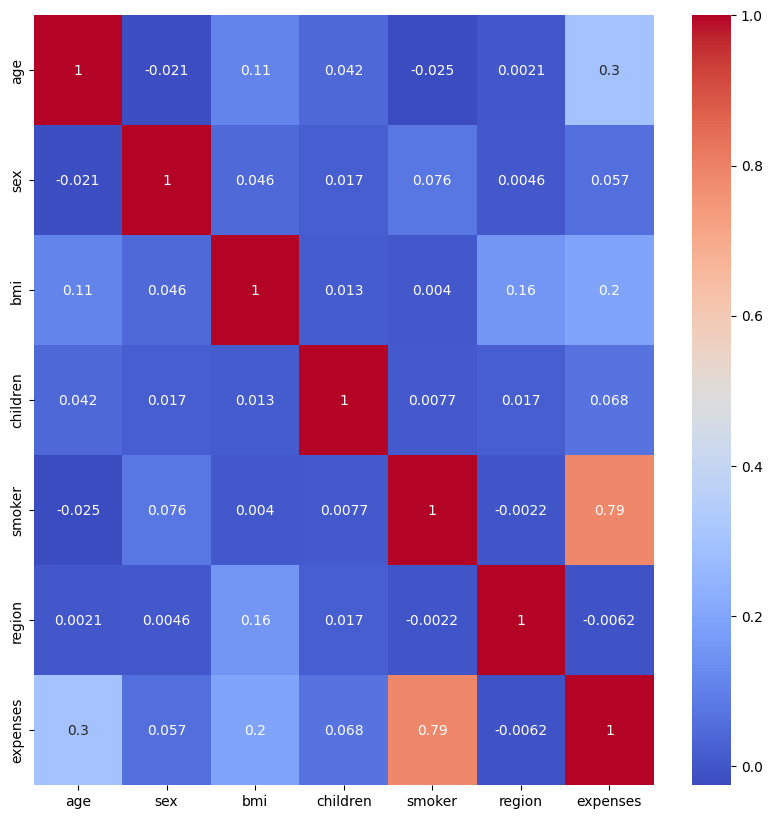

In [60]:
corr_matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

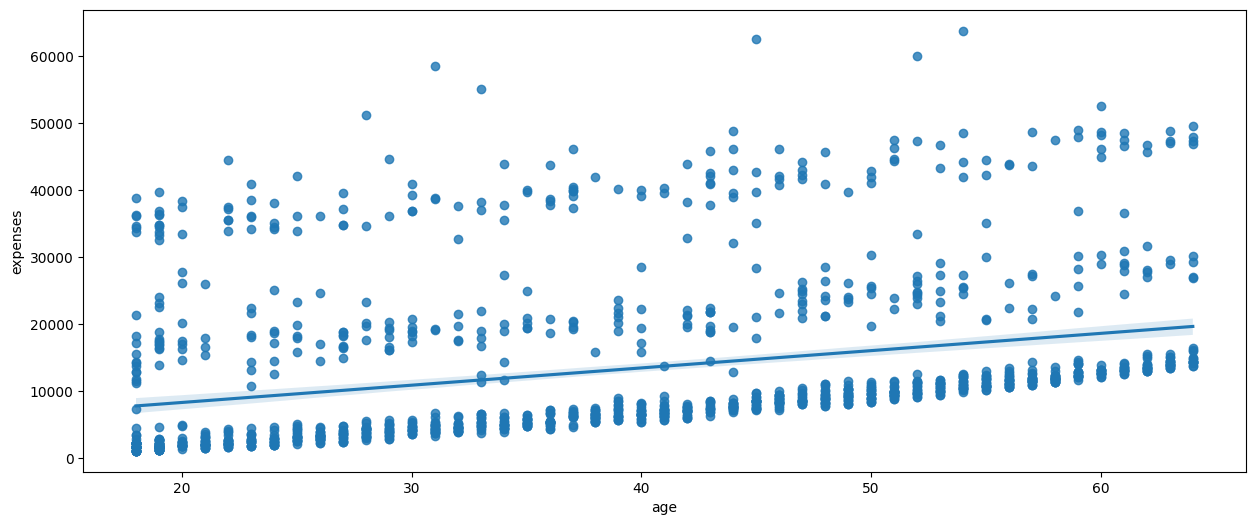

In [56]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'expenses', data = df)
plt.show()

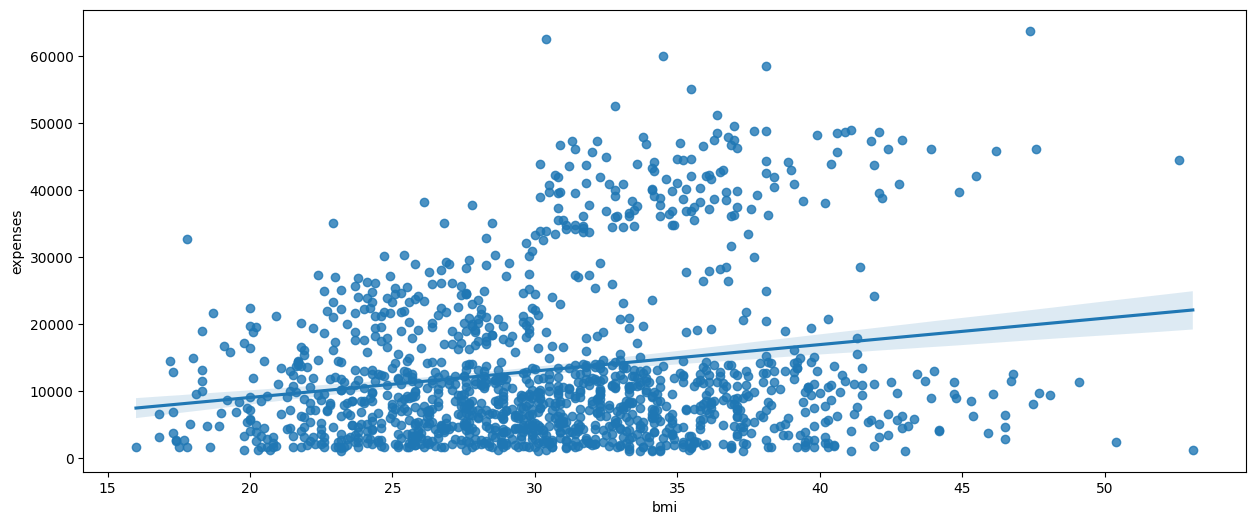

In [58]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'expenses', data = df)
plt.show()

In [29]:
# we are not going to handle outliers for tree models and have to handle for linear models by using some normalisation or standardisation of data

In [30]:
# first we convert the categorical values to numerical values by using label encoder

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_col=df.select_dtypes(include=['object']).columns
for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [32]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [35]:
from sklearn.utils import resample

# Step 1: Split the dataframe into two groups
smokers = df[df['smoker'] == 1]
non_smokers = df[df['smoker'] == 0]

# Step 2: Upsample the minority class (if non-smokers are fewer)
non_smokers_upsampled = resample(non_smokers,
                                 replace=True,            # sample with replacement
                                 n_samples=len(smokers),  # match number of smokers
                                 random_state=42)         # reproducibility

# Step 3: Combine the two groups
df_balanced = pd.concat([smokers, non_smokers_upsampled])

# Step 4: Shuffle the combined dataframe
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Check the new class balance
print(df_balanced['smoker'].value_counts())


smoker
1    274
0    274
Name: count, dtype: int64


In [36]:
df_balanced

,age,sex,bmi,children,smoker,region,expenses
0,20,0,21.8,0,1,3,20167.34
1,61,0,36.4,1,1,0,48517.56
2,20,0,24.4,0,1,2,26125.67
3,28,0,33.0,2,0,2,4349.46
4,18,1,23.3,1,0,2,1711.03
...,...,...,...,...,...,...,...
543,31,1,34.4,3,1,1,38746.36
544,19,1,30.3,0,1,2,32548.34
545,30,0,23.7,3,1,1,18765.88
546,45,1,33.7,1,0,3,7445.92


In [38]:
from sklearn.model_selection import train_test_split
X=df_balanced.drop(columns=['expenses'])
y=df_balanced['expenses']

In [40]:
# standardisation of data in X 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Standard scaling: mean = 0, std = 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Min-Max scaling: scales features to range [0, 1]
scaler_1 = MinMaxScaler()
X_normal = scaler_1.fit_transform(X)


In [43]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [45]:
X_scaled.shape

(548, 6)

In [44]:
X_train.shape

(438, 6)

In [46]:
X_test.shape

(110, 6)

In [47]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
# Define pipelines
pipelines = {
    'LinearRegression': Pipeline([
        ('model', LinearRegression())
    ]),
    'Lasso': Pipeline([
        ('model', Lasso())
    ]),
    'Ridge': Pipeline([
        ('model', Ridge())
    ])
}

# Define hyperparameter grids
param_grids = {
    'LinearRegression': {},
    'Lasso': {
        'model__alpha': [0.001, 0.01, 0.1, 1, 10]
    },
    'Ridge': {
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
    }
}

# Perform GridSearchCV for each model
for name in pipelines:
    print(f"\n{name} Results:")
    grid = GridSearchCV(pipelines[name], param_grids[name], cv=5, scoring='r2')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    
    print(f"Best Params: {grid.best_params_}")
    print(f"Test R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")



LinearRegression Results:
Best Params: {}
Test R² Score: 0.8279
Test MSE: 40518593.4591

Lasso Results:
Best Params: {'model__alpha': 10}
Test R² Score: 0.8281
Test MSE: 40470608.2735

Ridge Results:
Best Params: {'model__alpha': 1}
Test R² Score: 0.8281
Test MSE: 40476395.5921


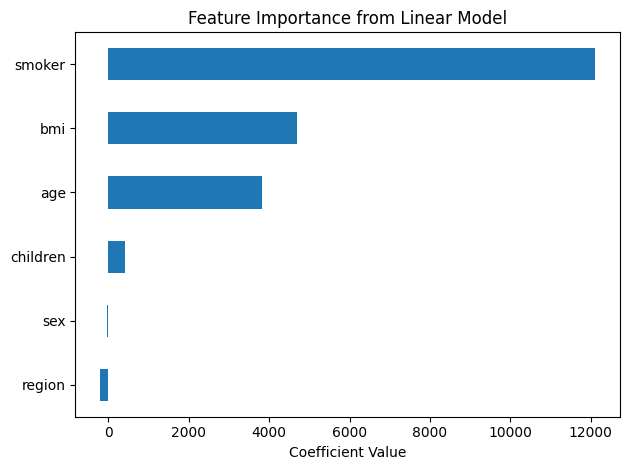

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Feature importance from coefficients
feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance = feature_importance.sort_values()

# Plot
feature_importance.plot(kind='barh', title='Feature Importance from Linear Model')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()


In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

2025-07-30 17:55:17.613992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753898117.849703      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753898117.924167      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [62]:
df.shape

(1338, 7)

In [64]:
df_balanced.shape

(548, 7)

In [63]:
X_normal.shape

(548, 6)

In [75]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 6))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 50)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 150)            │         7,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         7,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,251 (149.42 KB)

 Trainable params: 38,251 (149.42 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:

X_train,X_test,y_train,y_test=train_test_split(X_normal,y,test_size=0.2,random_state=42)
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size= 20, validation_split = 0.2)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 586774400.0000 - val_loss: 702790400.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 594394432.0000 - val_loss: 652708480.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 504589600.0000 - val_loss: 443104224.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 333536160.0000 - val_loss: 209274128.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 194127728.0000 - val_loss: 209776640.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 180556176.0000 - val_loss: 210548016.0000
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 192318544.0000 - val_loss: 207450368.0000
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 179082880.0000 - val_loss: 207842976.0000
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 187432256.0000 - val_loss: 205581504.0000
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 182910640.0000 - val_loss: 205

In [78]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
result = ANN_model.evaluate(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 41247836.0000 


In [79]:
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

MSE: 40476451.43
RMSE: 6362.11
MAE: 5558.55
R² Score: 0.8281
